# Import the packages and modules

In [1]:
from gym_vrp.envs import SantaIRPEnv
from agents import IRPAgent

import torch


## Train the agent

In [2]:
# Original
# batch_size = 256
# seed = 69
# num_nodes = 20

# Quick Test
# batch_size = 10
# seed = 23
# num_nodes = 5

batch_size = 128
seed = 23
num_nodes = 10

#num_epochs = 851
num_epochs = 251

In [3]:
# Instantiate the SantaIRPEnv environment
env_santa_irp = SantaIRPEnv(num_nodes=num_nodes, batch_size=batch_size, seed=seed)

# Instantiate the IRPAgent (assuming it's compatible with SantaIRPEnv)
agent_santa_irp = IRPAgent(
    seed=seed, csv_path=f"./train_logs/loss_log_santa_irp_{num_nodes}_{seed}.csv",
)
# Train the agent
agent_santa_irp.train(
    env_santa_irp,
    epochs=num_epochs,
    check_point_dir=f"./check_points/santa_irp_{num_nodes}_{seed}/",
)

INFO:root:Start Training
INFO:root:Update Baseline
INFO:root:Epoch 0 finished - Loss: 152.3783721923828, Advantage: -9.805706024169922 Dist: -56.725738525390625


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 1 finished - Loss: -158.13343811035156, Advantage: 10.135801315307617 Dist: 23.347599029541016
INFO:root:Update Baseline
INFO:root:Epoch 2 finished - Loss: 1492.900634765625, Advantage: -99.84546661376953 Dist: 23.381698608398438


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 3 finished - Loss: -1193.398681640625, Advantage: 80.07312774658203 Dist: -96.71634674072266


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 4 finished - Loss: 570.0458984375, Advantage: -39.818363189697266 Dist: 23.235219955444336


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 5 finished - Loss: 279.7287902832031, Advantage: -19.594757080078125 Dist: -56.95808792114258
INFO:root:Update Baseline
INFO:root:Epoch 6 finished - Loss: -423.8017578125, Advantage: 30.385602951049805 Dist: -56.82443618774414
INFO:root:Update Baseline
INFO:root:Epoch 7 finished - Loss: -420.8435363769531, Advantage: 30.50293731689453 Dist: -16.92765235900879
INFO:root:Update Baseline
INFO:root:Epoch 8 finished - Loss: -7.1390204429626465, Advantage: 0.4689754247665405 Dist: -17.039751052856445
INFO:root:Update Baseline
INFO:root:Epoch 9 finished - Loss: -680.0580444335938, Advantage: 50.66496658325195 Dist: -97.10957336425781
INFO:root:Update Baseline
INFO:root:Epoch 10 finished - Loss: -826.974609375, Advantage: 60.493675231933594 Dist: -16.941829681396484
INFO:root:Update Baseline
INFO:root:Epoch 11 finished - Loss: 1283.052490234375, Advantage: -99.44336700439453 Dist: 42.828880310058594
INFO:root:Update Baseline
INFO:root:Epoch 12 finished

replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 14 finished - Loss: 871.2443237304688, Advantage: -69.13195037841797 Dist: 22.77457046508789
INFO:root:Update Baseline
INFO:root:Epoch 15 finished - Loss: 1227.609130859375, Advantage: -98.94499206542969 Dist: 22.68868064880371
INFO:root:Update Baseline
INFO:root:Epoch 16 finished - Loss: -491.09552001953125, Advantage: 41.00114822387695 Dist: -57.22727966308594
INFO:root:Update Baseline
INFO:root:Epoch 17 finished - Loss: -376.2629699707031, Advantage: 31.086490631103516 Dist: -37.38814163208008
INFO:root:Update Baseline
INFO:root:Epoch 18 finished - Loss: 1297.2930908203125, Advantage: -108.83180236816406 Dist: 42.44316864013672
INFO:root:Update Baseline
INFO:root:Epoch 19 finished - Loss: -940.9794921875, Advantage: 81.2496109008789 Dist: -17.52066993713379
INFO:root:Update Baseline
INFO:root:Epoch 20 finished - Loss: 218.14747619628906, Advantage: -18.779281616210938 Dist: -37.54041290283203
INFO:root:Update Baseline
INFO:root:Epoch 21 fini

replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 22 finished - Loss: 329.958984375, Advantage: -28.902557373046875 Dist: -17.59308624267578
INFO:root:Update Baseline
INFO:root:Epoch 23 finished - Loss: 436.6885986328125, Advantage: -38.86759948730469 Dist: 2.36344051361084


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 24 finished - Loss: 318.16796875, Advantage: -28.945781707763672 Dist: 2.4076125621795654
INFO:root:Update Baseline
INFO:root:Epoch 25 finished - Loss: -117.76844024658203, Advantage: 10.992517471313477 Dist: -37.60261535644531


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 26 finished - Loss: 318.8058166503906, Advantage: -28.849794387817383 Dist: -17.727863311767578
INFO:root:Update Baseline
INFO:root:Epoch 27 finished - Loss: -325.83306884765625, Advantage: 30.88555145263672 Dist: -17.619853973388672
INFO:root:Update Baseline
INFO:root:Epoch 28 finished - Loss: -342.3935546875, Advantage: 30.952619552612305 Dist: -37.61315155029297
INFO:root:Update Baseline
INFO:root:Epoch 29 finished - Loss: -542.26806640625, Advantage: 50.778289794921875 Dist: -57.55987548828125
INFO:root:Update Baseline
INFO:root:Epoch 30 finished - Loss: -330.5227355957031, Advantage: 30.874984741210938 Dist: -57.62586212158203
INFO:root:Update Baseline
INFO:root:Epoch 31 finished - Loss: -527.0948486328125, Advantage: 51.04560470581055 Dist: -57.675758361816406
INFO:root:Update Baseline
INFO:root:Epoch 32 finished - Loss: 93.73963165283203, Advantage: -9.065229415893555 Dist: 22.49052619934082
INFO:root:Update Baseline
INFO:root:Epoch 33 f

replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 35 finished - Loss: -817.2193603515625, Advantage: 80.39935302734375 Dist: -57.608856201171875


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 36 finished - Loss: 404.3297424316406, Advantage: -39.60767364501953 Dist: 22.301315307617188
INFO:root:Update Baseline
INFO:root:Epoch 37 finished - Loss: -599.828125, Advantage: 60.42080307006836 Dist: -37.750213623046875
INFO:root:Update Baseline
INFO:root:Epoch 38 finished - Loss: -397.0567932128906, Advantage: 40.354888916015625 Dist: -37.7428092956543
INFO:root:Update Baseline
INFO:root:Epoch 39 finished - Loss: -199.044677734375, Advantage: 20.528541564941406 Dist: -37.71604537963867
INFO:root:Update Baseline
INFO:root:Epoch 40 finished - Loss: -197.39793395996094, Advantage: 20.361949920654297 Dist: -77.70735931396484
INFO:root:Update Baseline
INFO:root:Epoch 41 finished - Loss: -4.561468601226807, Advantage: 0.4984731078147888 Dist: -37.72645950317383
INFO:root:Update Baseline
INFO:root:Epoch 42 finished - Loss: 567.403076171875, Advantage: -59.43423843383789 Dist: -17.782398223876953
INFO:root:Update Baseline
INFO:root:Epoch 43 finish

## Visualise the actions of the agent in the environments

In [4]:
# env = TSPEnv(num_nodes=num_nodes, batch_size=batch_size, seed=seed, num_draw=3)
# TSPModel='./check_points/tsp_5_23/model_epoch_250.pt'

In [5]:
# Setup for evaluation
env_santa_irp.enable_video_capturing(
    video_save_path=f"./videos/video_test_santa_irp_{num_nodes}_{seed}.mp4"
)

In [6]:
#agent_santa_irp = IRPAgent(seed=seed)
agent_santa_irp.model.load_state_dict(torch.load(f"./check_points/santa_irp_{num_nodes}_{seed}/model_epoch_250.pt"))

<All keys matched successfully>

<Figure size 640x480 with 0 Axes>

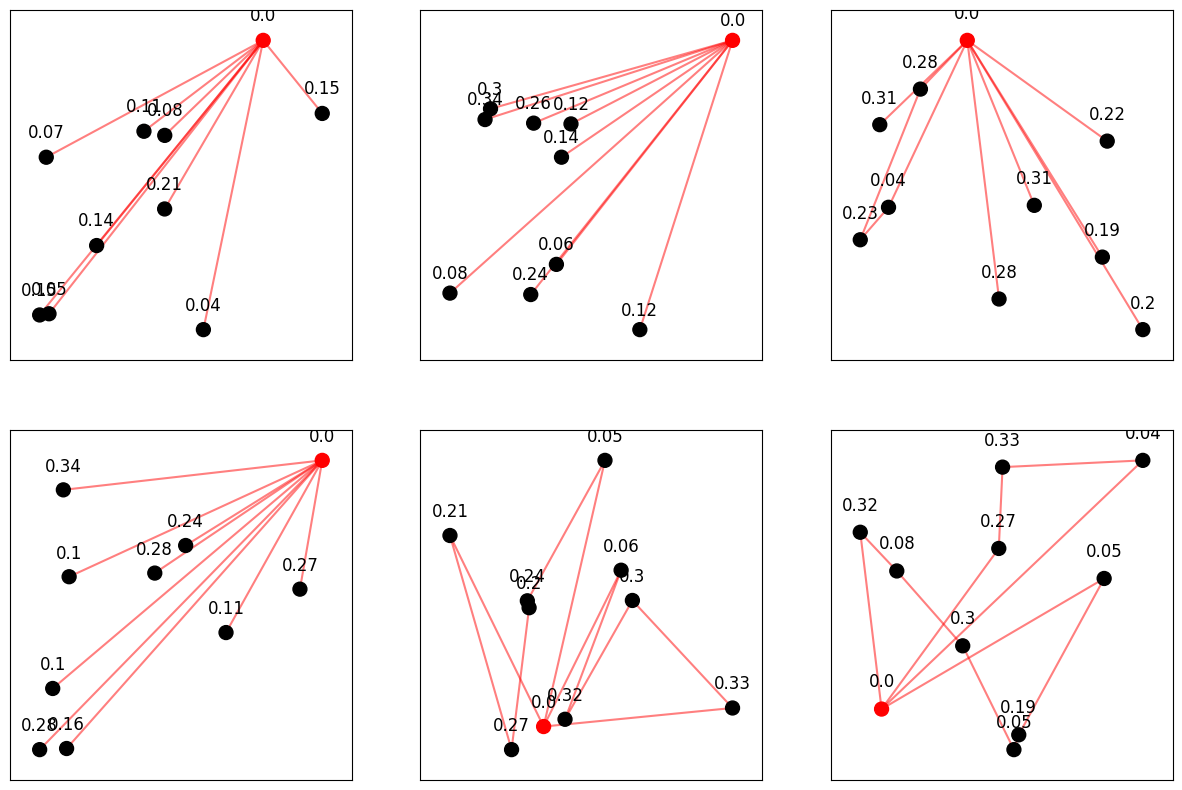

In [7]:
# Evaluate the agent
loss_a = agent_santa_irp.evaluate(env_santa_irp)

In [8]:
# Close the video recorder
env_santa_irp.vid.close()

Moviepy - Building video ./videos/video_test_santa_irp_10_23.mp4.
Moviepy - Writing video ./videos/video_test_santa_irp_10_23.mp4



Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_irp_10_23.mp4
